In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mentalhealth_df = pd.read_csv('/home/student/Documents/datasets/patient-characteristics-survey-pcs-2017-1.csv')

# Dataset Overview

The **Patient Characteristics Survey (PCS): 2017** dataset contains demographic information about clients served by mental health providers during a specific survey week in 2017. This dataset helps in analyzing demographic trends, identifying service gaps, and ensuring equitable access to mental health services.

## Column Definitions

- **Sex**: Gender of the client (Male, Female, Unknown).
- **Transgender Status**: Whether the client is transgender (No, Yes, Unknown).
- **Age**: Age group of the client (Child, Adult, Unknown).
- **Race**: Client's racial identity (White, Black, Multi-racial, Other, Unknown).
- **Ethnicity**: Ethnic background of the client (Non-Hispanic, Hispanic, Client Did Not Answer, Unknown).
- **Region of Provider**: Specific region where the service provider is located.

## Key Insights

- The dataset reveals demographic disparities in mental health service utilization.
- A significant portion of data may have missing or "Unknown" values, indicating gaps in data collection.
- Insights from this dataset can guide policy-making and resource allocation to better serve underrepresented groups.


In [3]:
mentalhealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187192 entries, 0 to 187191
Data columns (total 67 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Survey Year                       187192 non-null  int64 
 1   Program Category                  187192 non-null  object
 2   Region Served                     187192 non-null  object
 3   Age Group                         187192 non-null  object
 4   Sex                               187192 non-null  object
 5   Transgender                       187192 non-null  object
 6   Sexual Orientation                187192 non-null  object
 7   Hispanic Ethnicity                187192 non-null  object
 8   Race                              187192 non-null  object
 9   Living Situation                  187192 non-null  object
 10  Household Composition             187192 non-null  object
 11  Preferred Language                187192 non-null  object
 12  Ve

In [4]:
mentalhealth_df.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,YES,NO,NO,NO,NO,NO,132
1,2017,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,UNKNOWN,146
2,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,131
3,2017,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,YES,NO,NO,NO,NO,112
4,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,NO,130


# Data Cleaning

# Dropping the three digit residence zip code so that I can focus on more detailed or relevant location data, which can lead to more accurate insights.

In [5]:
mentalhealth_df.drop(columns=['Three Digit Residence Zip Code'], inplace=True)

# Dropping household_composition column because it contains alot of unknown values

In [19]:
mentalhealth_df.drop(columns=['household_composition'], inplace=True)

# Dropping the No Insurance Column because the dataset already has detailed information on different types of insurance coverage, a separate column for "no insurance" might be redundant.Also very few people fall into this category, making it less useful for analysis.

# Dropping the unknown_insurance_coverage column because it contains ambiguous or missing information that doesn't contribute useful insights. Since it doesn't clarify whether individuals have coverage, it might not be valuable for analysis.

In [20]:
mentalhealth_df.drop(['unknown_insurance_coverage', 'no_insurance'], axis=1, inplace=True)

In [21]:
categorical_cols = mentalhealth_df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_cols)

Categorical Columns:
Index(['program_category', 'region_served', 'age_group', 'sex', 'transgender',
       'Sexual Orientation', 'hispanic_ethnicity', 'race', 'living_situation',
       'preferred_language', 'veteran_status', 'employment_status',
       'education_status', 'special_education_services', 'mental_illness',
       'intellectual_disability', 'autism_spectrum',
       'other_developmental_disability', 'alcohol_related_disorder',
       'drug_substance_disorder', 'mobility_impairment_disorder',
       'hearing_visual_impairment', 'hyperlipidemia', 'high_blood_pressure',
       'diabetes', 'obesity', 'heart_attack', 'stroke', 'other_cardiac',
       'pulmonary_asthma', 'alzheimer_or_dementia', 'kidney_disease',
       'liver_disease', 'endocrine_condition', 'neurological_condition',
       'traumatic_brain_injury', 'joint_disease', 'cancer',
       'other_chronic_med_condition', 'no_chronic_med_condition',
       'unknown_chronic_med_condition', 'smokes',
       'received_smok

In [24]:
for col in categorical_cols:
    mentalhealth_df[col] = mentalhealth_df[col].replace('unknown', np.nan)
    mentalhealth_df[col] = mentalhealth_df[col].fillna(mentalhealth_df[col].mode()[0])
print("Updated DataFrame after handling 'unknown' values:")
print(mentalhealth_df[categorical_cols].isnull().sum())

Updated DataFrame after handling 'unknown' values:
program_category               0
region_served                  0
age_group                      0
sex                            0
transgender                    0
                              ..
medicare_insurance             0
private_insurance              0
child_health_plus_insurance    0
other_insurance                0
criminal_justice_status        0
Length: 61, dtype: int64


# identifying unique values in the columns

In [25]:
for col in mentalhealth_df.select_dtypes(include=['object']).columns:
    unique_values = mentalhealth_df[col].unique()
    print(f"Unique values for column '{col}': {unique_values}")

Unique values for column 'program_category': ['OUTPATIENT' 'SUPPORT' 'INPATIENT' 'RESIDENTIAL' 'EMERGENCY']
Unique values for column 'region_served': ['CENTRAL NY REGION' 'WESTERN REGION' 'NEW YORK CITY REGION'
 'LONG ISLAND REGION' 'HUDSON RIVER REGION']
Unique values for column 'age_group': ['ADULT' 'CHILD' 'UNKNOWN']
Unique values for column 'sex': ['FEMALE' 'MALE' 'UNKNOWN']
Unique values for column 'transgender': ['NO, NOT TRANSGENDER' 'YES, TRANSGENDER' 'UNKNOWN' "CLIENT DIDN'T ANSWER"]
Unique values for column 'Sexual Orientation': ['STRAIGHT OR HETEROSEXUAL' 'UNKNOWN' 'BISEXUAL' 'OTHER' 'LESBIAN OR GAY'
 'CLIENT DID NOT ANSWER']
Unique values for column 'hispanic_ethnicity': ['NO, NOT HISPANIC/LATINO' 'UNKNOWN' 'YES, HISPANIC/LATINO']
Unique values for column 'race': ['WHITE ONLY' 'UNKNOWN RACE' 'BLACK ONLY' 'OTHER' 'MULTI-RACIAL']
Unique values for column 'living_situation': ['PRIVATE RESIDENCE' 'OTHER LIVING SITUATION' 'UNKNOWN'
 'INSTITUTIONAL SETTING']
Unique values for col

# One hot encoding

In [26]:
mentalhealth_df.replace("UNKNOWN", pd.NA, inplace=True)
categorical_columns = [
    'program_category', 'region_served', 'age_group', 'sex', 'transgender',
    'Sexual Orientation', 'hispanic_ethnicity', 'race', 'living_situation',
    'preferred_language', 'veteran_status', 'employment_status',
    'education_status', 'special_education_services', 'mental_illness',
    'intellectual_disability', 'autism_spectrum', 'other_developmental_disability',
    'alcohol_related_disorder', 'drug_substance_disorder', 
    'mobility_impairment_disorder', 'hearing_visual_impairment',
    'hyperlipidemia', 'high_blood_pressure', 'diabetes', 'obesity',
    'heart_attack', 'stroke', 'other_cardiac', 'pulmonary_asthma',
    'alzheimer_or_dementia', 'kidney_disease', 'liver_disease',
    'endocrine_condition', 'neurological_condition', 'traumatic_brain_injury',
    'joint_disease', 'cancer', 'other_chronic_med_condition',
    'no_chronic_med_condition', 'unknown_chronic_med_condition', 'smokes',
    'received_smoking_medication', 'received_smoking_counseling',
    'serious_mental_illness', 'principal_diagnosis_class',
    'additional_diagnosis_class', 'ssi_cash_assistance',
    'ssdi_cash_assistance', 'veterans_disability_benefits',
    'veterans_cash_assistance', 'public_assistance_cash_program',
    'other_cash_benefits', 'medicaid_and_medicare_insurance',
    'medicaid_insurance', 'medicaid_managed_insurance', 
    'medicare_insurance', 'private_insurance',
    'child_health_plus_insurance', 'other_insurance', 
    'criminal_justice_status'
]
mentalhealth_encoded = pd.get_dummies(mentalhealth_df, columns=categorical_columns, drop_first=True)
print(mentalhealth_encoded.head())

   survey_year  number_of_hours_worked_each_week  program_category_INPATIENT  \
0         2017                               NaN                       False   
1         2017                               NaN                       False   
2         2017                               NaN                       False   
3         2017                               NaN                       False   
4         2017                               NaN                       False   

   program_category_OUTPATIENT  program_category_RESIDENTIAL  \
0                         True                         False   
1                        False                         False   
2                         True                         False   
3                         True                         False   
4                         True                         False   

   program_category_SUPPORT  region_served_HUDSON RIVER REGION  \
0                     False                              False   
1 

# Binary encoding

In [27]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 KB 356.9 kB/s eta 0:00:00m eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 KB 351.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 398.1 kB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import category_encoders as ce

In [29]:
data = {
    'program_category': ['OUTPATIENT', 'SUPPORT', 'INPATIENT', 'RESIDENTIAL', 'EMERGENCY'],
    'region_served': ['CENTRAL NY REGION', 'WESTERN REGION', 'NEW YORK CITY REGION', 'LONG ISLAND REGION', 'HUDSON RIVER REGION']
}
mentalhealth_df = pd.DataFrame(data)

In [32]:
encoder = ce.BinaryEncoder(cols=['program_category', 'region_served'])
mentalhealth_df_encoded = encoder.fit_transform(mentalhealth_df)
print(mentalhealth_df_encoded)

   program_category_0  program_category_1  program_category_2  \
0                   0                   0                   1   
1                   0                   1                   0   
2                   0                   1                   1   
3                   1                   0                   0   
4                   1                   0                   1   

   region_served_0  region_served_1  region_served_2  
0                0                0                1  
1                0                1                0  
2                0                1                1  
3                1                0                0  
4                1                0                1  


# Reduce Cardinality

# Identifying Categorical Features with High Cardinality

In [43]:
threshold = 4
categorical_cols = mentalhealth_df.select_dtypes(include=['object']).columns
cardinality = {col: mentalhealth_df[col].nunique() for col in categorical_cols}
high_cardinality_cols = {col: count for col, count in cardinality.items() if count > threshold}
print(high_cardinality_cols)

{'program_category': 5, 'region_served': 5}


# Grouping Rare Categories

In [44]:
threshold_count = 3 
counts = mentalhealth_df['program_category'].value_counts()
rare_categories = counts[counts < threshold_count].index
mentalhealth_df['program_category'] = mentalhealth_df['program_category'].replace(rare_categories, 'Other')

# Feature Binning

In [45]:
mentalhealth_df['region_served'] = mentalhealth_df['region_served'].replace({
    'HUDSON RIVER REGION': 'Northeast',
    'LONG ISLAND REGION': 'Northeast',
    'NEW YORK CITY REGION': 'Northeast',
    'WESTERN REGION': 'West'
})

# Check the unique value counts after cardinality reduction

In [46]:
print(mentalhealth_df['program_category'].value_counts())
print(mentalhealth_df['region_served'].value_counts())

program_category
Other    5
Name: count, dtype: int64
region_served
Northeast            3
CENTRAL NY REGION    1
West                 1
Name: count, dtype: int64


# Creating New Features

# Combining Categories

In [47]:
mentalhealth_df['program_region'] = mentalhealth_df['program_category'] + '_' + mentalhealth_df['region_served']
print(mentalhealth_df[['program_category', 'region_served', 'program_region']].head())

  program_category      region_served           program_region
0            Other  CENTRAL NY REGION  Other_CENTRAL NY REGION
1            Other               West               Other_West
2            Other          Northeast          Other_Northeast
3            Other          Northeast          Other_Northeast
4            Other          Northeast          Other_Northeast


# Extracting Components

In [48]:
mentalhealth_df['is_inpatient'] = mentalhealth_df['program_category'].apply(lambda x: 1 if 'INPATIENT' in x else 0)
print(mentalhealth_df[['program_category', 'is_inpatient']].head())

  program_category  is_inpatient
0            Other             0
1            Other             0
2            Other             0
3            Other             0
4            Other             0


# Visualizing Initial Data Distribution

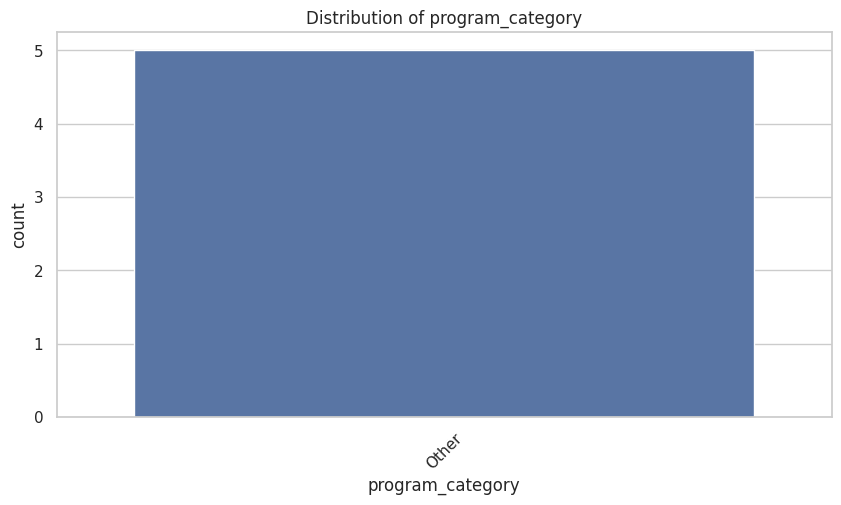

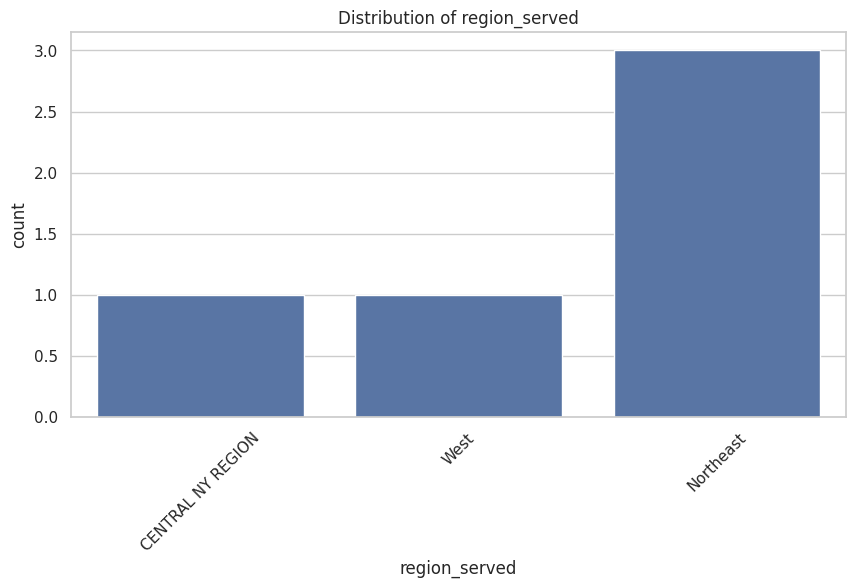

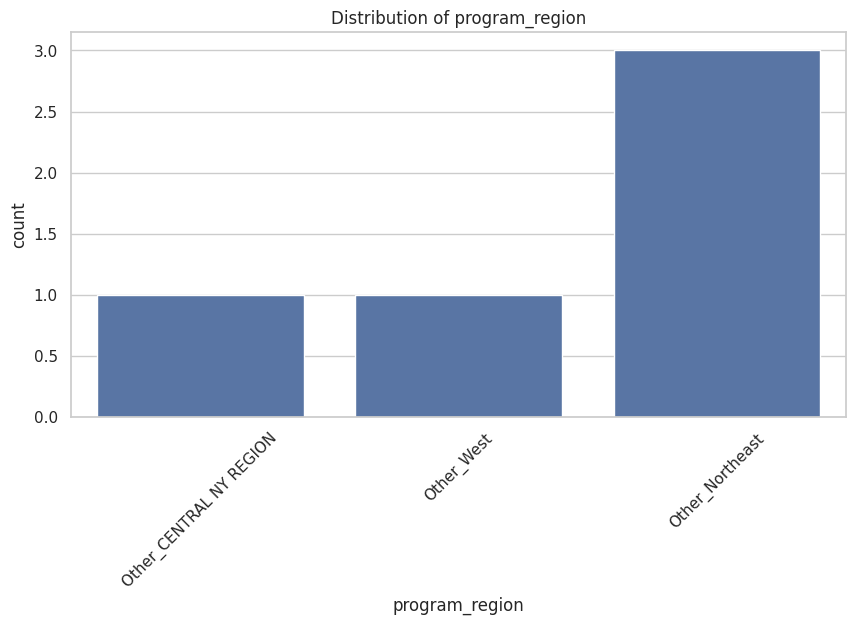

In [50]:
sns.set(style="whitegrid")
categorical_cols = mentalhealth_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=mentalhealth_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Visualizing High Cardinality Features

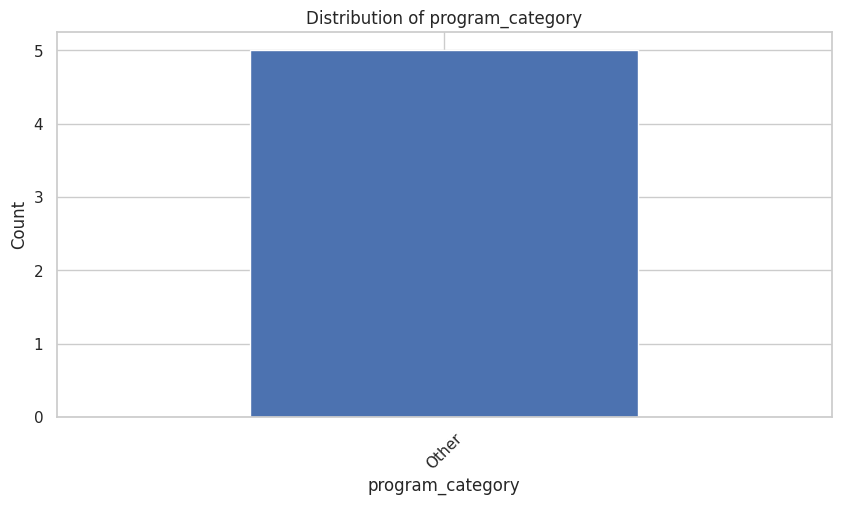

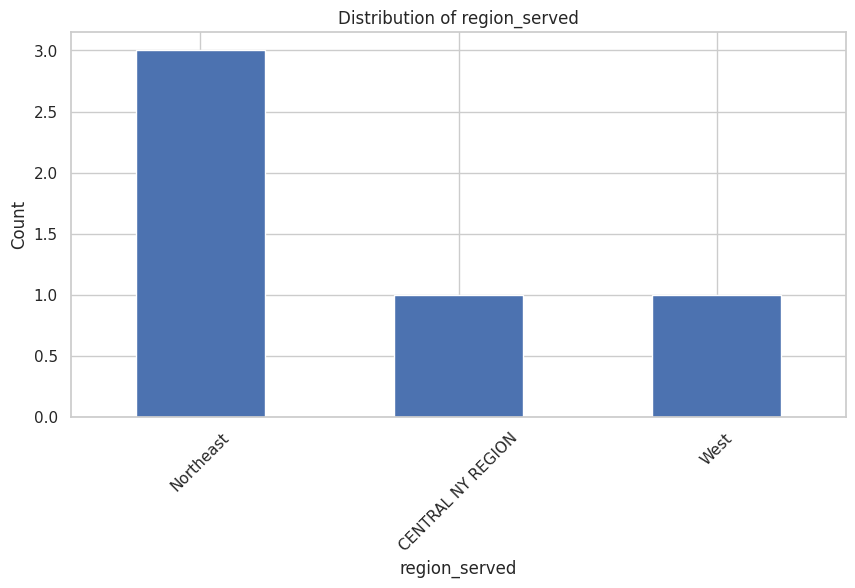

In [51]:
high_cardinality_cols = ['program_category', 'region_served']
for col in high_cardinality_cols:
    plt.figure(figsize=(10, 5))
    mentalhealth_df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Visualizing Newly Created Features

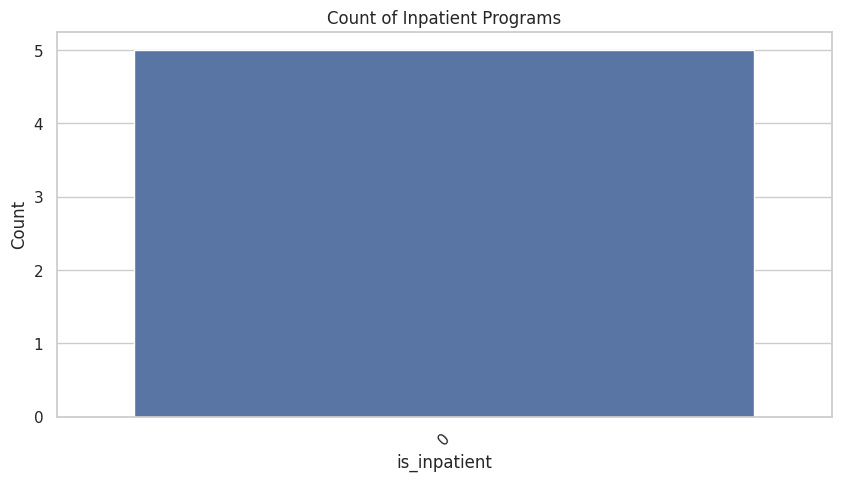

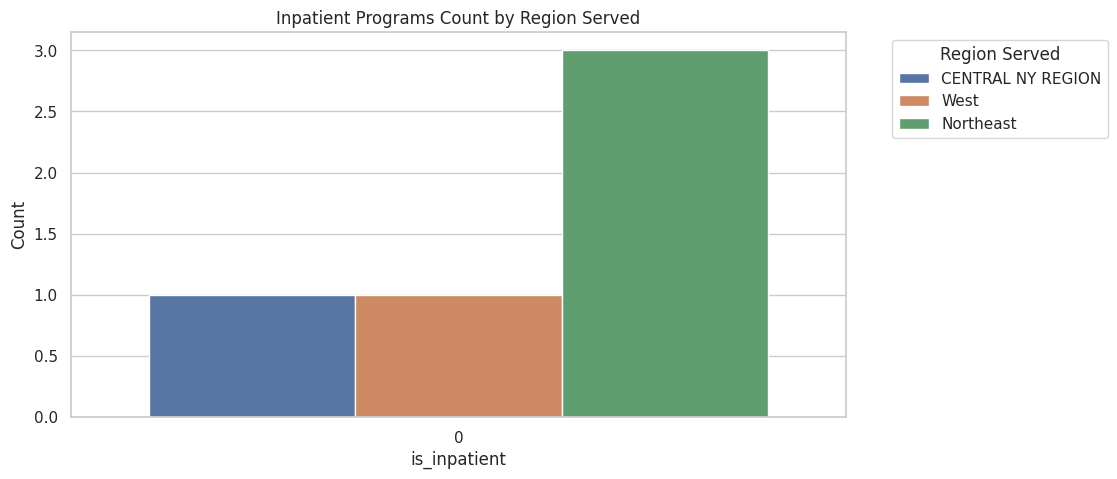

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(data=mentalhealth_df, x='is_inpatient')
plt.title('Count of Inpatient Programs')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(data=mentalhealth_df, x='is_inpatient', hue='region_served')
plt.title('Inpatient Programs Count by Region Served')
plt.ylabel('Count')
plt.legend(title='Region Served', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Renaming columns

In [7]:
mentalhealth_df.rename(columns={
    'Survey Year': 'survey_year',
    'Program Category': 'program_category',
    'Region Served': 'region_served',
    'Age Group': 'age_group',
    'Sex': 'sex',
    'Transgender': 'transgender',
    'Hispanic Ethnicity': 'hispanic_ethnicity',
    'Race': 'race',
    'Living Situation': 'living_situation',
    'Measure ID': 'measure_id',
    'Measure Numerator': 'measure_numerator',
    'Measure Denominator': 'measure_denominator',
    'Measure Scaling Factor': 'measure_scaling_factor',
    'Suppression Indicator': 'suppression_indicator',
}, inplace=True)

In [8]:
mentalhealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187192 entries, 0 to 187191
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   survey_year                       187192 non-null  int64 
 1   program_category                  187192 non-null  object
 2   region_served                     187192 non-null  object
 3   age_group                         187192 non-null  object
 4   sex                               187192 non-null  object
 5   transgender                       187192 non-null  object
 6   Sexual Orientation                187192 non-null  object
 7   hispanic_ethnicity                187192 non-null  object
 8   race                              187192 non-null  object
 9   living_situation                  187192 non-null  object
 10  Household Composition             187192 non-null  object
 11  Preferred Language                187192 non-null  object
 12  Ve

In [9]:
mentalhealth_df.rename(columns={
    'Household Composition': 'household_composition',
    'Preferred Language': 'preferred_language',
    'Veteran Status': 'veteran_status',
    'Employment Status': 'employment_status',
    'Number Of Hours Worked Each Week': 'number_of_hours_worked_each_week',
    'Education Status': 'education_status',
    'Special Education Services': 'special_education_services',
    'Mental Illness': 'mental_illness',
    'Intellectual Disability': 'intellectual_disability',
    'Autism Spectrum': 'autism_spectrum',
    'Other Developmental Disability': 'other_developmental_disability',
    'Alcohol Related Disorder': 'alcohol_related_disorder',
    'Drug Substance Disorder': 'drug_substance_disorder',
    'Mobility Impairment Disorder': 'mobility_impairment_disorder',
    'Hearing Visual Impairment': 'hearing_visual_impairment',
    'Hyperlipidemia': 'hyperlipidemia',
    'High Blood Pressure': 'high_blood_pressure',
    'Diabetes': 'diabetes',
    'Obesity': 'obesity',
    'Heart Attack': 'heart_attack',
    'Stroke': 'stroke',
    'Other Cardiac': 'other_cardiac',
    'Pulmonary Asthma': 'pulmonary_asthma',
    'Alzheimer or Dementia': 'alzheimer_or_dementia',
    'Kidney Disease': 'kidney_disease',
    'Liver Disease': 'liver_disease',
    'Endocrine Condition': 'endocrine_condition',
    'Neurological Condition': 'neurological_condition',
    'Traumatic Brain Injury': 'traumatic_brain_injury',
    'Joint Disease': 'joint_disease',
    'Cancer': 'cancer',
    'Other Chronic Med Condition': 'other_chronic_med_condition',
    'No Chronic Med Condition': 'no_chronic_med_condition',
    'Unknown Chronic Med Condition': 'unknown_chronic_med_condition',
    'Smokes': 'smokes',
    'Received Smoking Medication': 'received_smoking_medication',
    'Received Smoking Counseling': 'received_smoking_counseling',
    'Serious Mental Illness': 'serious_mental_illness',
    'Principal Diagnosis Class': 'principal_diagnosis_class',
    'Additional Diagnosis Class': 'additional_diagnosis_class',
    'SSI Cash Assistance': 'ssi_cash_assistance',
    'SSDI Cash Assistance': 'ssdi_cash_assistance',
    'Veterans Disability Benefits': 'veterans_disability_benefits',
    'Veterans Cash Assistance': 'veterans_cash_assistance',
    'Public Assistance Cash Program': 'public_assistance_cash_program',
    'Other Cash Benefits': 'other_cash_benefits',
    'Medicaid and Medicare Insurance': 'medicaid_and_medicare_insurance',
    'Unknown Insurance Coverage': 'unknown_insurance_coverage',
    'No Insurance': 'no_insurance',
    'Medicaid Insurance': 'medicaid_insurance',
    'Medicaid Managed Insurance': 'medicaid_managed_insurance',
    'Medicare Insurance': 'medicare_insurance',
    'Private Insurance': 'private_insurance',
    'Child Health Plus Insurance': 'child_health_plus_insurance',
    'Other Insurance': 'other_insurance',
    'Criminal Justice Status': 'criminal_justice_status',
}, inplace=True)
mentalhealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187192 entries, 0 to 187191
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   survey_year                       187192 non-null  int64 
 1   program_category                  187192 non-null  object
 2   region_served                     187192 non-null  object
 3   age_group                         187192 non-null  object
 4   sex                               187192 non-null  object
 5   transgender                       187192 non-null  object
 6   Sexual Orientation                187192 non-null  object
 7   hispanic_ethnicity                187192 non-null  object
 8   race                              187192 non-null  object
 9   living_situation                  187192 non-null  object
 10  household_composition             187192 non-null  object
 11  preferred_language                187192 non-null  object
 12  ve